In [17]:
import recordlinkage
import pandas as pd

In [3]:
from recordlinkage import datasets

In [4]:
from recordlinkage.standardise import clean

In [5]:
# Name data for indexing
names_1 = ['alfred', 'bob', 'calvin', 'hobbes', 'rusty']
names_2 = ['alfred', 'danny', 'callum', 'hobie', 'rusty']

# Convert to DataFrames
df_a = pd.DataFrame(pd.Series(names_1, name='names'))
df_b = pd.DataFrame(pd.Series(names_2, name='names'))

In [17]:
df_a

,names
0,alfred
1,bob
2,calvin
3,hobbes
4,rusty


In [18]:
df_b

,names
0,alfred
1,danny
2,callum
3,hobie
4,rusty


In [14]:
# Create indexing object
indexer = rl.index.Full()

# Create pandas MultiIndex containing candidate links
candidate_links_full = indexer.index(df_a, df_b)

In [15]:
pd.DataFrame(candidate_links_full)

,0
0,"(0, 0)"
1,"(0, 1)"
2,"(0, 2)"
3,"(0, 3)"
4,"(0, 4)"
5,"(1, 0)"
6,"(1, 1)"
7,"(1, 2)"
8,"(1, 3)"
9,"(1, 4)"


In [13]:
# Create indexing object
indexer = rl.index.Block(left_on='names')

# Create pandas MultiIndex containing candidate links
candidate_links_block = indexer.index(df_a, df_b)

In [16]:
pd.DataFrame(candidate_links_block)

,0
0,"(0, 0)"
1,"(4, 4)"


In [25]:
# Create indexing object
indexer = rl.index.Random(n=5)

# Create pandas MultiIndex containing candidate links
candidate_links_random = indexer.index(df_a, df_b)

In [26]:
pd.DataFrame(candidate_links_random)

,0
0,"(0, 2)"
1,"(4, 1)"
2,"(2, 4)"
3,"(2, 4)"
4,"(2, 3)"


# Sorted Record Linkage
- http://networkslab.org/2017/07/18/2017-07-18-neighbourhood/
- Internally, the SortedNeighbourhoodIndex does the following to determine candidate links:

It places the data from both data frames into one series.
It sorts the series.
For each element, it looks within the specified window. If two elements from different data frames are within the window, they are considered a candidate link.

In [28]:
# Create indexing object
indexer = rl.index.SortedNeighbourhood(left_on='names', window=3)

# Create pandas MultiIndex containing candidate links
candidate_links_sortedneigh = indexer.index(df_a, df_b)

In [29]:
pd.DataFrame(candidate_links_sortedneigh)

,0
0,"(1, 2)"
1,"(2, 1)"
2,"(3, 3)"
3,"(0, 0)"
4,"(4, 4)"
5,"(1, 0)"
6,"(2, 2)"
7,"(3, 1)"
8,"(4, 3)"


window=3라는 거는 두 테이블을 합쳐서 순서대로 세워놓고, 본인 기준 앞뒤로 두 개의 값을 neighboor라고 보겠다는 것

In [31]:
['alfred', ALFRED, BOB, CALLUM, 'calvin', 'danny', 'hobbes', 'hobie', 'rusty', 'rusty']
['alfred', 'alfred', BOB, CALLUM, CALVIN, 'danny', 'hobbes', 'hobie', 'rusty', 'rusty']
['alfred', 'alfred', 'bob', CALLUM, CALVIN, DANNY, 'hobbes', 'hobie', 'rusty', 'rusty']
['alfred', 'alfred', 'bob', 'callum', CALVIN, DANNY, HOBBES, 'hobie', 'rusty', 'rusty']
['alfred', 'alfred', 'bob', 'callum', 'calvin', DANNY, HOBBES, HOBIE, 'rusty', 'rusty']
['alfred', 'alfred', 'bob', 'callum', 'calvin', 'danny', HOBBES, HOBIE, RUSTY, 'rusty']
['alfred', 'alfred', 'bob', 'callum', 'calvin', 'danny', 'hobbes', HOBIE, RUSTY, RUSTY]
['alfred', 'alfred', 'bob', 'callum', 'calvin', 'danny', 'hobbes', 'hobie', RUSTY, RUSTY]

NameError: name 'ALFRED' is not defined

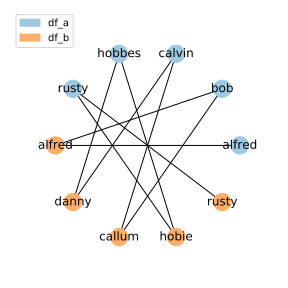

In [34]:
from IPython.display import SVG
SVG(url='http://networkslab.org/sorted_neighborhood_network.svg')

In [2]:
from recordlinkage.datasets import load_febrl4

In [4]:
dfA, dfB = load_febrl4()

In [8]:
dfA.head(4)

,given_name,surname,street_number,address_1,address_2,suburb,postcode,state,date_of_birth,soc_sec_id
rec_id,,,,,,,,,,
rec-1070-org,michaela,neumann,8,stanley street,miami,winston hills,4223,nsw,19151111,5304218
rec-1016-org,courtney,painter,12,pinkerton circuit,bega flats,richlands,4560,vic,19161214,4066625
rec-4405-org,charles,green,38,salkauskas crescent,kela,dapto,4566,nsw,19480930,4365168
rec-1288-org,vanessa,parr,905,macquoid place,broadbridge manor,south grafton,2135,sa,19951119,9239102


In [15]:
dfB.head(4)

,given_name,surname,street_number,address_1,address_2,suburb,postcode,state,date_of_birth,soc_sec_id
rec_id,,,,,,,,,,
rec-561-dup-0,elton,NaN,3,light setreet,pinehill,windermere,3212,vic,19651013,1551941
rec-2642-dup-0,mitchell,maxon,47,edkins street,lochaoair,north ryde,3355,nsw,19390212,8859999
rec-608-dup-0,NaN,white,72,lambrigg street,kelgoola,broadbeach waters,3159,vic,19620216,9731855
rec-3239-dup-0,elk i,menzies,1,lyster place,NaN,northwood,2585,vic,19980624,4970481


### 1. Short case study

In [18]:
# Indexation step
indexer = recordlinkage.Index()
indexer.block('given_name')
candidate_links = indexer.index(dfA, dfB)
# Comparison step
compare_cl = recordlinkage.Compare()
compare_cl.exact('given_name', 'given_name', label='given_name')
compare_cl.string('surname', 'surname', method='jarowinkler', threshold=0.85, label='surname')
compare_cl.exact('date_of_birth', 'date_of_birth', label='date_of_birth')
compare_cl.exact('suburb', 'suburb', label='suburb')
compare_cl.exact('state', 'state', label='state')
compare_cl.string('address_1', 'address_1', threshold=0.85, label='address_1')
features = compare_cl.compute(candidate_links, dfA, dfB)
# Classification step
matches = features[features.sum(axis=1) > 3]
print(len(matches))

3241


In [35]:
class FirstLetterWIndex(BaseIndexAlgorithm):
"""Custom class for indexing"""
def _link_index(self, df_a, df_b):
"""Make pairs with given names starting with the letter 'w'."""
# Select records with names starting with a w.
name_a_w = df_a[df_a['given_name'].str.startswith('w') == True]
name_b_w = df_b[df_b['given_name'].str.startswith('w') == True]
# Make a product of the two numpy arrays
return pandas.MultiIndex.from_product(
[name_a_w.index.values, name_b_w.index.values],
names=[df_a.index.name, df_b.index.name]
)
indexer = FirstLetterWIndex()
candidate_pairs = indexer.index(df_a, df_b)
print ('Returns a', type(candidate_pairs).__name__)
print ('Number of candidate record pairs starting with the letter w:', len(candidate_
˓→pairs))

IndentationError: expected an indented block (<ipython-input-35-64bcff5bdaa7>, line 2)

#  Data Deduplication

In [30]:
import recordlinkage as rl
from recordlinkage.datasets import load_febrl4
df_a, df_b = load_febrl4()
indexer = rl.Index()

In [32]:
indexer.block('given_name', 'given_name')
indexer.block('surname', 'surname')

<Index>

In [34]:
len(indexer.index(df_a, df_b))

159506

In [20]:
dfA = census_data_1990
dfA.head()

,given_name,surname,street_number,address_1,address_2,suburb,postcode,state,date_of_birth,soc_sec_id
rec_id,,,,,,,,,,
rec-223-org,NaN,waller,6,tullaroop street,willaroo,st james,4011,wa,19081209,6988048
rec-122-org,lachlan,berry,69,giblin street,killarney,bittern,4814,qld,19990219,7364009
rec-373-org,deakin,sondergeld,48,goldfinch circuit,kooltuo,canterbury,2776,vic,19600210,2635962
rec-10-dup-0,kayla,harrington,NaN,maltby circuit,coaling,coolaroo,3465,nsw,19150612,9004242
rec-227-org,luke,purdon,23,ramsay place,mirani,garbutt,2260,vic,19831024,8099933


In [21]:
indexer = recordlinkage.Index()
indexer.full()
candidate_links = indexer.index(dfA)

In [24]:
indexer = recordlinkage.Index()
indexer.block('given_name')
candidate_links = indexer.index(dfA)
print (len(candidate_links))

2082


In [ ]:
indexer = recordlinkage.Index()
indexer.SortedNeighbourhood('given_name')
candidate_links = indexer.index(dfA)
print (len(candidate_links))